<a href="https://colab.research.google.com/github/kaigy1/dropRagnarok/blob/master/HW2Lucas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from mpl_toolkits import mplot3d
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import tensorflow as tf
import keras

Using TensorFlow backend.


Test plot

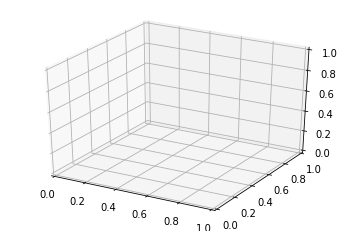

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')

Problem 1:


In [0]:
def f(x,y):
  return (x + 2*y+5)

def f1(x,y):
  return (x ** 2 + y ** 2)

def f2(x,y):
  return (500- x ** 2 - y ** 2)

def f3(x,y):
  return 1*np.cos(np.sqrt(x**2+y**2))  

Function 1:

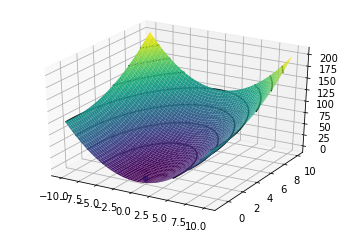

In [0]:
x = np.linspace(-10,10,100)
y = np.linspace(-1,10,500)
X, Y = np.meshgrid(x,y)
Z =f1(X,Y)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z,cmap='viridis',edgecolor='none')
plt.contour(X, Y, Z, colors='black');
ax.scatter(0,0,0,cmap='black',linewidth=1.5)
p1=(0,0,0)

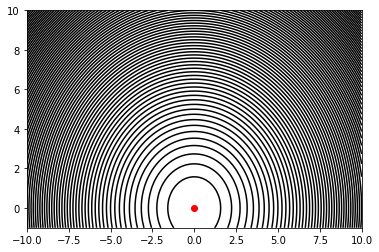

In [0]:
plt.contour(X, Y, Z,80, colors='black')
plt.plot(0, 0, 'ro')

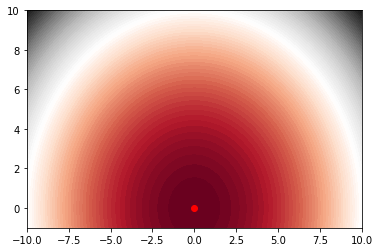

In [0]:
plt.contourf(X, Y, Z, 80, cmap='RdGy')
plt.plot(0, 0, 'ro')

Fuction 2:

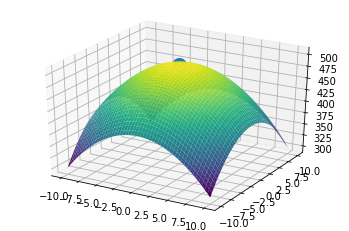

In [0]:
x2 = np.linspace(-10,10,500)
y2 = np.linspace(-10,10,500)
X2, Y2 = np.meshgrid(x2,y2)
Z2 =f2(X2,Y2)

fig = plt.figure()
ax2 = fig.gca(projection='3d')
ax2.plot_surface(X2, Y2, Z2,cmap='viridis',edgecolor='none')
p2=(0,0,500)
ax2.scatter(0,0,500,cmap='ro',linewidth=10.5)

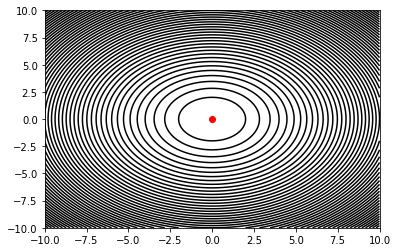

In [0]:
plt.contour(X2, Y2, Z2,60, colors='black');
plt.plot(0, 0, 'ro')

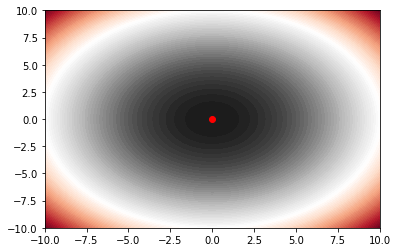

In [0]:
plt.contourf(X2, Y2, Z2, 80, cmap='RdGy')
plt.plot(0, 0, 'ro')

Function 3:

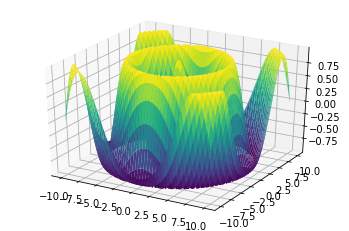

In [0]:
x3 = np.linspace(-10,10,200)
y3 = np.linspace(-10,10,310)
X3, Y3 = np.meshgrid(x3,y3)
Z3 =f3(X3,Y3)
fig = plt.figure()
ax3 = fig.gca(projection='3d')
ax3.plot_surface(X3, Y3, Z3,cmap='viridis',edgecolor='none')
ax.scatter(0,0,.9,cmap='ro',linewidth=50.5)

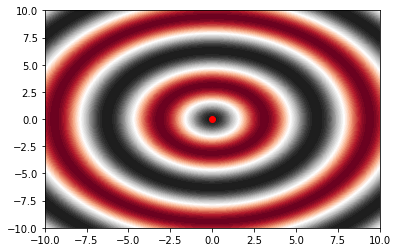

In [0]:
plt.contourf(X3, Y3, Z3, 50, cmap='RdGy')
plt.plot(0, 0, 'ro')

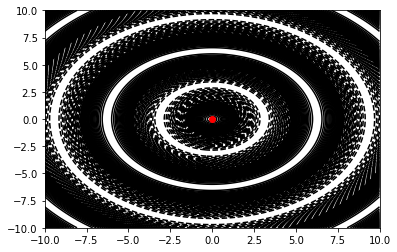

In [0]:
plt.contour(X3, Y3, Z3,60, colors='black');
plt.plot(0, 0, 'ro')

Problem 2:

It has trouble predicting a plane that w1,w converging to 0 
Why is that?

In [0]:
np.random.seed(42)
xs =   10*np.random.rand(100, 1)
ys =   10*np.random.rand(100, 1)
zs =   -5 + np.random.rand(100,1) +xs +ys

Xs,Ys = np.meshgrid(xs,ys)

(0, 10)

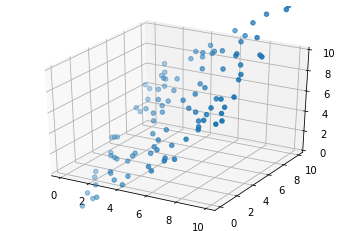

In [0]:
ax = plt.axes(projection = '3d')
ax.scatter3D(xs, ys, zs, cmap='Greens');
ax.set_zlim(0,10)

In [0]:
# split the data into training and test sets
# train set
train_xs = xs[:80]
train_ys = ys[:80]
train_zs = zs[:80]
# test set
test_xs = xs[80:]
test_ys = ys[80:]
test_zs = zs[80:]

In [0]:
# number of epochs
epochs = 10
# learning rate
lr = 0.01

In [0]:
# initial value for weight w and bias b
w = np.random.randn(1)
w1 = np.random.randn(1)
d = np.zeros(1)

In [0]:
for epoch in np.arange(epochs):
  for i in np.arange(80):
    z_pred = w * train_xs[i] + w1 * train_ys[i] + d
    
    grad_w = (z_pred - train_zs[i]) * train_xs[i]
    grad_w1 = (z_pred - train_zs[i]) * train_ys[i]
    grad_d = (z_pred - train_zs[i])
  
    w -= lr * grad_w
    w1 -= lr * grad_w1
    d -= lr * grad_d

In [0]:
test_loss = 0
for i in np.arange(20):
  test_loss += 0.5 * (w * test_xs[i] + d + w1 * test_ys[i] - test_zs) ** 2
test_loss /= 20

In [0]:
predz=d + w * test_xs + w1 * test_ys

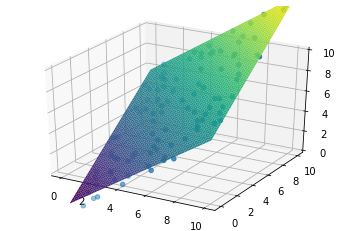

In [0]:

x = np.linspace(-0,10,500)
y = np.linspace(-0,10,500)
X_test, Y_test = np.meshgrid(x,y)
final_Z = d + w * X_test + w1 * Y_test

fig=plt.figure()
ax=fig.gca(projection='3d')
ax.set_zlim3d(-0,10)
ax.scatter3D(xs, ys, zs, cmap='Greens');
ax.plot_surface(X_test, Y_test, final_Z,cmap='viridis',edgecolor='none')

In [0]:
print(w1)

[0.90432617]


In [0]:
print(w)

[0.9212179]


In [0]:
print(d)

[-3.25532997]


Problem 3:

In [0]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data(path='mnist.npz')

count=0
sum=0
for i in y_train:
  count+=1
  sum+=i

x=sum/count
count1=0
sum1=0
for i in y_test:
  count1+=1
  sum1+=i

a=sum1/count1

(x+a)/2

11493376/11490434 [==============================] - 0s 0us/step


4.448666666666666

Therefore the average is 4 